# Murphy Diagrams

[Ehm, W., Gneiting, T., Jordan, A. and Krüger, F., 2016. Of quantiles and expectiles: consistent scoring functions, Choquet representations and forecast rankings. Journal of the Royal Statistical Society Series B: Statistical Methodology, 78(3), pp.505-562.](https://academic.oup.com/jrsssb/article/78/3/505/7040984?login=false)

The MSE is a consistent scoring function for forecasting the mean or expected value of the predicitive distribution. But did you know that there is a whole family of proper scoring rules that are consistent for the mean?

[Savage (1971)](http://www.jstor.org/stable/2284229) showed that any function is consistent for the mean if and only if

$S(x, y) = \phi(y) - \phi(x) -\phi'(x)(y-x)$ where $x$ is the forecast value and $y$ is the observation, where $\phi$ is convex with subgradient $\phi'$

[Ehm et al. (2016)](https://academic.oup.com/jrsssb/article/78/3/505/7040984?login=false) showed that when a scoring function $S$ satisfying the above equation can be written as

$S(x, y) = \int_{-\infty}^{\infty} S_{\theta} (x, y) dH({\theta})$.

Where $H$ is a non-negative measure, and

$ S_{\theta}(x, y) =  
	\begin{cases}
           |y-\theta |, &  \text{min}(x, y) \le \theta < \text{max}(x, y) \\
           0, & \text{otherwise}
	\end{cases},
$

which is the elementary scoring function.

This means we can construct an infinite amount of different scoring rules that are consistent for forecasting the mean by carying $H$.

The Murphy diagram simply the mean elementary scoring function for $n$ forecast cases plotted across all user decision thresholds $\theta$. It can be extend to work with
- expectile forecast
- quantile forecasts
- Huber quantile forecast
- probabilistic forecasts of binary outcomes.

We'll show how Murphy diagrams can be produced with `scores` with some synthetic temperature forecast data.

In [48]:
from scores.continuous import murphy_score, murphy_thetas, mse
import numpy as np
import xarray as xr
from scipy.stats import skewnorm

In [49]:
# Generate some synthetic forecast data
N = 1000
obs = xr.DataArray(data=40 * np.random.random(N), dims=["time"], coords={"time": np.arange(0, N)})

fcst1 = 0.9 * obs + skewnorm.rvs(4, size=N)
fcst2 = 1.1 * obs - skewnorm.rvs(4, size=N)

Let's calculate the MSE for our two synthetic forecasts. 

In [50]:
print(f"MSE for fcst1 is {mse(fcst1, obs).item()}")
print(f"MSE for fcst2 is {mse(fcst2, obs).item()}")

MSE for fcst1 is 3.35885605074917
MSE for fcst2 is 3.469638598827335


As you can see, they are very similar. Next we will generate our murphy scores and plot them. To plot the Murphy Diagram for the mean, we choose "expectile" for the functional, and 0.5 for the $\alpha$

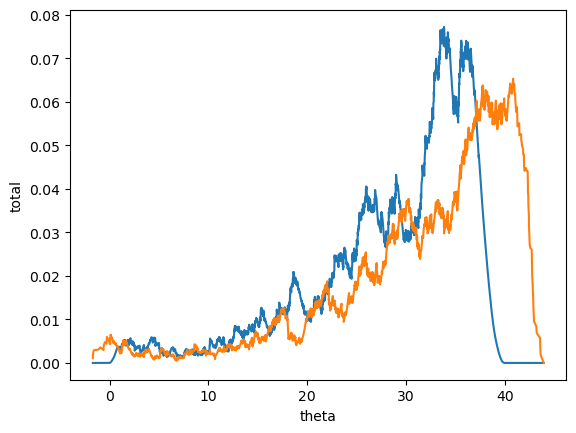

In [51]:
thetas = murphy_thetas([fcst1, fcst2], obs, "expectile")
ms1 = murphy_score(fcst1, obs, thetas, "expectile", 0.5)
ms2 = murphy_score(fcst2, obs, thetas, "expectile", 0.5)

ms1.total.plot()
ms2.total.plot()

- The x-axes shows the decision threshold $\theta$ (the temperature), while the y-axes shows the mean elementary score, sometimes interpreted as economic regret. 
- Lower values are better.
- The area under the curve is proportional to the MSE. They have similar total area under the curves and similar MSEs.
- Forecast 1 (blue line) is clearly better for higher decision thresholds above 40 degrees, while Forecast 2 (orange line) is general better for users who care about decision thresholds less than 40 degrees.
- One can imagine how constructing a scoring function by varying $H$ could lead to one forecast system being better than another.

The Murphy diagram is then a powerful tool for understanding how forecast performance differs based on the importance of various user decision thresholds!

**Things to try next**
- Try setting "decomposition" to True.
- Test it out for other functionals.
- Try it with n dimensional data
- Calculate the confidence that one forecast is better than another as a function of $\theta$ using the Diebold Mariano test statistic